In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [4]:
# Write your code in jupyter notebook and upload it to github and share the link for submission

**Question 1.** 

You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

Note: You have to code the logic from scratch

In [5]:
def int_quart_range(l):
    
    l.sort()
    p1=0.25*(len(l)+1)
    Q1=( l[math.floor(p1)-1] + l[math.ceil(p1)-1] )/2  
    
    p2=0.75*(len(l)+1)
    Q2=( l[math.floor(p2)-1] + l[math.ceil(p2)-1] )/2
    return (Q2-Q1)

In [6]:
l=[21,53,3,4,7,2,234,422,4]
int_quart_range(l)

140.0

In [7]:
l=[3,53,757,2,29,5,3,2,63,7]
int_quart_range(l)

55.5

In [8]:
l=[1,2,3,4,5,6,7,8]
int_quart_range(l)

4.0

In [9]:
l=[15,34,7,12,18,9,1,42,56,28,13,24,35]
int_quart_range(l)

24.0

**Question 2:**

 Plot a histogram for total team scores for all IPL games.

Note: Per match 2 teams will play hence total number scores would be = no. of matches * 2

In [10]:
match=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")

In [11]:
mega=match.merge(delivery,left_on='id',right_on='match_id')

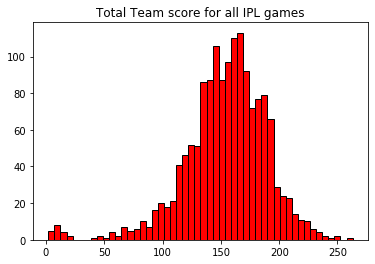

In [12]:
score=delivery.groupby(['match_id','inning']).sum()['total_runs']

plt.hist(score.values, bins = 50,color='red',edgecolor='k')
plt.title('Total Team score for all IPL games')
plt.show()

**Question 3.**

 Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

Note : if you don't know about economy read this https://en.wikipedia.org/wiki/Economy_rate_(cricket)

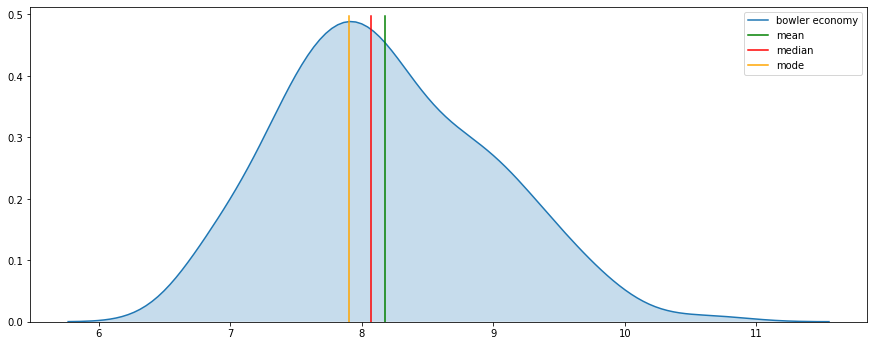

In [19]:
balls_gt_300=delivery.groupby('bowler').size()>300

balls_gt_300=mega[mega['bowler'].isin(balls_gt_300[balls_gt_300].index)]

over_count=balls_gt_300.groupby(['bowler','match_id']).nunique()['over'].reset_index()
over_count=over_count.groupby('bowler').sum()['over'].reset_index()

runs_count=balls_gt_300.groupby('bowler').sum()['total_runs'].reset_index()

record=over_count.merge(runs_count,on='bowler')
eco=(record['total_runs']/record['over']).values

mode,count=stats.mode(np.around(eco,1))

plt.subplots(figsize=(15,5.8))
sns.kdeplot(eco,shade=True,label='bowler economy')
plt.axvline(np.mean(eco),color='g', ymax=0.97,label='mean')
plt.axvline(np.median(eco),color='r', ymax=0.97,label='median')
plt.axvline(mode,color='orange', ymax=0.97,label='mode')
plt.legend()
plt.show()

In [14]:
# resultant pdf is skewed towards the right
# mode < median < mean
# henced positively skewed

**Question 4:**

Give three examples of negatively skewed data and 3 examples of positively skewed data